# Objective

The goal of this data analysis project would be identify opportunities to increase the occupency rate on low-performing flights which can ultimetly lead to increase profitablity for the airline.(The goal of this data analysis project is to find ways to increase the number of passengers on flights that are not doing well, which can help the airline make more money.)

# Importing Libraries

In [1]:
import sqlite3 #The sqlite3 module in Python provides a way to interact with SQLite databases.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #The warnings module in Python is used to manage and control warning messages that are generated by Python programs.
warnings.filterwarnings('ignore') #You can control how warnings are handled using functions like warnings.filterwarnings()

# Database Connection

In [2]:
conn=sqlite3.connect('travel.sqlite') #connecting python to the sqlite database
cursor=conn.cursor() #It's used to execute SQL commands and fetch data from the database.

In [3]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")#executing query
print("* List of tables *")
#tables=cursor.fetchall() #fetching result
#for table in tables:     #printing tables
   # print(table[0])
tables = [table[0] for table in cursor.fetchall()] #printing list of tables
print(tables)


* List of tables *
['aircrafts_data', 'airports_data', 'boarding_passes', 'bookings', 'flights', 'seats', 'ticket_flights', 'tickets']


#  Data Exploration

In [4]:
aircrafts_data=pd.read_sql_query('SELECT * FROM aircrafts_data',conn)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [5]:
airports_data=pd.read_sql_query('SELECT * FROM airports_data',conn)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [6]:
boarding_passes=pd.read_sql_query('SELECT * FROM boarding_passes',conn)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [7]:
bookings =pd.read_sql_query('SELECT * FROM bookings',conn)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [8]:
flights=pd.read_sql_query('SELECT * FROM flights',conn)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [9]:
seats=pd.read_sql_query('SELECT * FROM seats',conn)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [10]:
ticket_flights=pd.read_sql_query('SELECT * FROM ticket_flights',conn)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [11]:
tickets=pd.read_sql_query('SELECT * FROM tickets',conn)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [12]:
#Datatype of each column in table
for table in tables:
    print('\ntable:',table)
    column_info=conn.execute('PRAGMA table_info({})'.format(table))
    for column in column_info.fetchall():
        print(column[1:3])


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

In [13]:
for table in tables:
    print('\ntable:',table)
    df_table =pd.read_sql_query(f"SELECT * FROM {table}",conn)
    print(df_table.isnull().sum())
    
                                


table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# basic Analysis

#### How many planes have more than 100 seats.

In [14]:
pd.read_sql_query("""SELECT aircraft_code,count(*) as 'no_of_seats' 
                   from seats group by aircraft_code having no_of_seats>100""",conn)

,aircraft_code,no_of_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


#### how the number of teacket booked and total amount earned changed with the time.

In [15]:
tickets=pd.read_sql_query("""select * from tickets inner join bookings
                            on tickets.book_ref=bookings.book_ref""",conn)
tickets['book_date']=pd.to_datetime(tickets['book_date']) #changes datatype of book_date column
tickets['date']=tickets['book_date'].dt.date # created new column date because we just want date form book_date column
tickets.dtypes #checking datatype 

ticket_no                          object
book_ref                           object
passenger_id                       object
book_ref                           object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
date                               object
dtype: object

In [16]:
tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


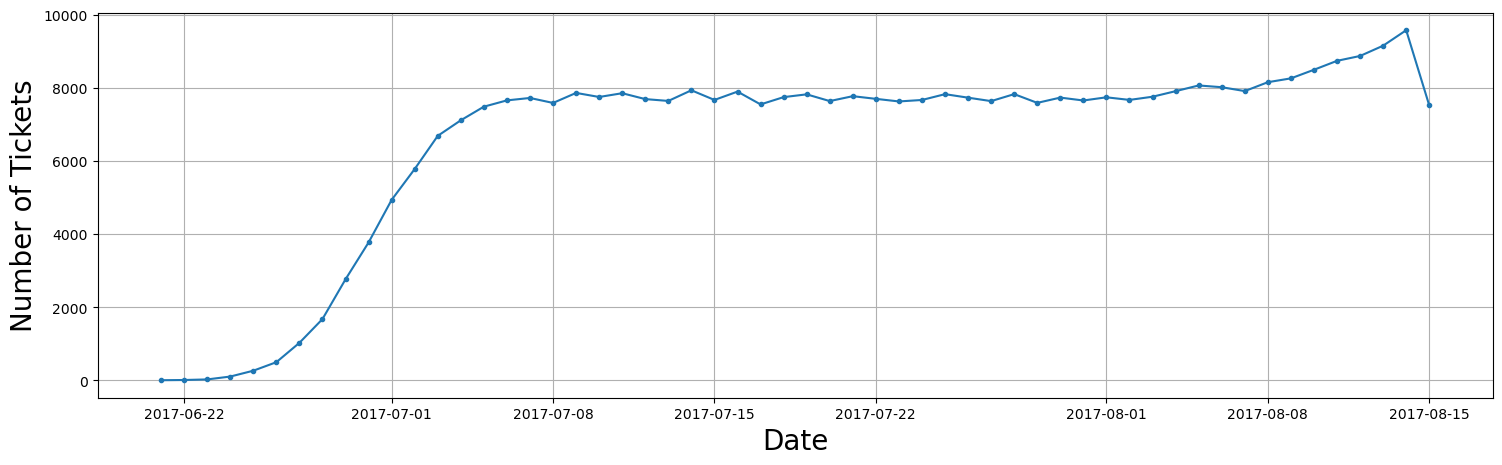

In [17]:
#Plotting Line Graph
x=tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,5))
plt.plot(x.index,x['date'],marker='.')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of Tickets',fontsize=20)
plt.grid()
plt.show()

In [18]:
booking=pd.read_sql_query("select * from bookings",conn)
booking['book_date']=pd.to_datetime(booking['book_date'])
booking['date']=booking['book_date'].dt.date
booking

,book_ref,book_date,total_amount,date
0,00000F,2017-07-05 03:12:00+03:00,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,2017-07-14
2,000068,2017-08-15 14:27:00+03:00,18100,2017-08-15
3,000181,2017-08-10 13:28:00+03:00,131800,2017-08-10
4,0002D8,2017-08-07 21:40:00+03:00,23600,2017-08-07
...,...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03:00,56000,2017-07-17
262784,FFFF2C,2017-08-08 05:55:00+03:00,10800,2017-08-08
262785,FFFF43,2017-07-20 20:42:00+03:00,78500,2017-07-20
262786,FFFFA8,2017-08-08 04:45:00+03:00,28800,2017-08-08


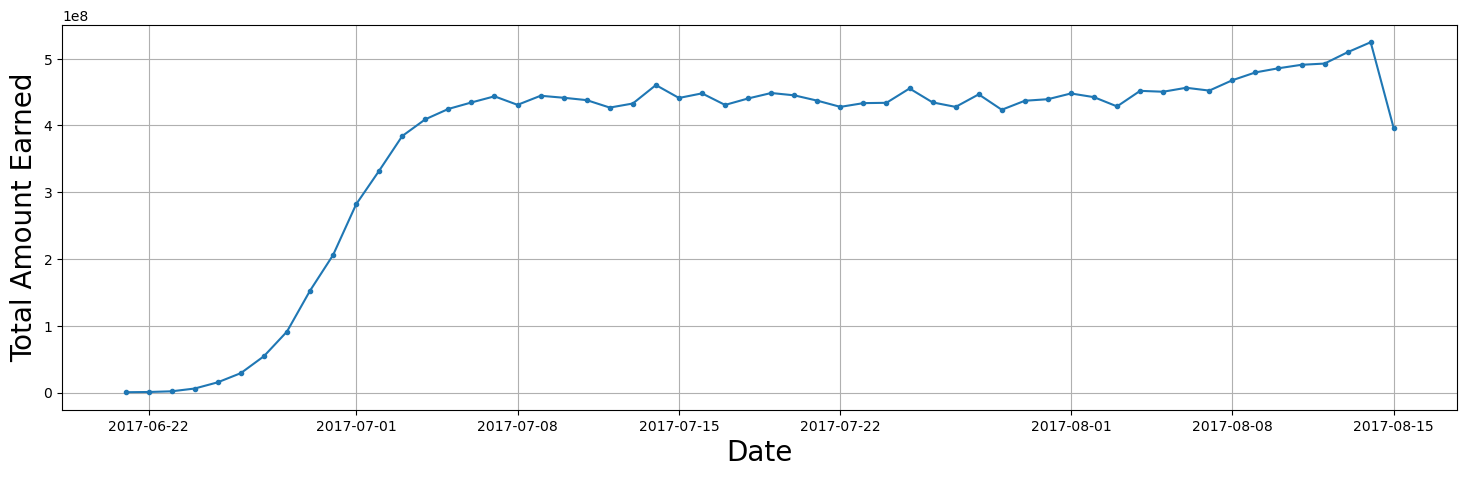

In [19]:
x=booking.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(18,5))
plt.plot(x.index,x['total_amount'],marker='.')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Total Amount Earned',fontsize=20)
plt.grid()
plt.show()

#### Calculate the average charge for each aircraft with different fair condition.

In [20]:
df=pd.read_sql_query("""select fare_conditions,aircraft_code,avg(amount) from ticket_flights join flights 
                     on ticket_flights.flight_id=flights.flight_id 
                     group by aircraft_code,fare_conditions""",conn)
df

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


<Axes: xlabel='aircraft_code', ylabel='avg(amount)'>

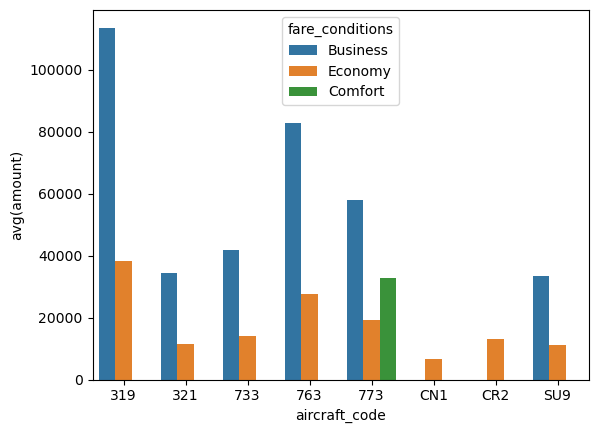

In [21]:
sns.barplot(data=df,x='aircraft_code',y='avg(amount)',hue='fare_conditions')

# Analysing occuoancy rate

#### For each Aircraft,calculate the toatl revenue per year and the average revenew per ticket.

In [22]:
pd.read_sql_query("""select aircraft_code,ticket_count,total_revenue,total_revenue/ticket_count as Average_Revenue_per_ticket from
(select aircraft_code,count(*) as ticket_count,sum(amount) as total_revenue from ticket_flights
                  join flights on ticket_flights.flight_id=flights.flight_id group by aircraft_code)""",conn)

,aircraft_code,ticket_count,total_revenue,Average_Revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


#### Calculate the average occupamcy per aircraft.

In [23]:
occupancy_rate=pd.read_sql_query("""select a.aircraft_code,avg(a.seats_count) as booked_seats,b.num_seats,avg(a.seats_count)/b.num_seats as occupancy_rate
from
(
select aircraft_code,flights.flight_id,count(*) as seats_count from boarding_passes
                   inner join flights 
                   on boarding_passes.flight_id=flights.flight_id
                   group by aircraft_code,flights.flight_id) as a
                   inner join
                   (select aircraft_code,count(*) as num_seats from seats group by aircraft_code) as b
                   on a.aircraft_code=b.aircraft_code group by a.aircraft_code""",conn
            )
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


#### Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.

In [24]:
occupancy_rate['Inc occupancy rate']=occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate       

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [28]:
total_revenue=pd.read_sql_query("""select aircraft_code,sum(amount) as total_revenue from ticket_flights 
                                   join flights 
                                   on ticket_flights.flight_id=flights.flight_id 
                                   group by aircraft_code""",conn)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [29]:
occupancy_rate['Inc total Annual turnover']=(total_revenue)['total_revenue']/occupancy_rate['occupancy_rate']*occupancy_rate['Inc occupancy rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc total Annual turnover
0,319,53.583181,116,0.461924,0.508116,2.976779e+09
1,321,88.809231,170,0.522407,0.574648,1.801981e+09
2,733,80.255462,130,0.617350,0.679085,1.569207e+09
3,763,113.937294,222,0.513231,0.564554,4.808405e+09
4,773,264.925806,402,0.659019,0.724921,3.774326e+09
5,CN1,6.004431,12,0.500369,0.550406,1.060112e+08
6,CR2,21.482847,50,0.429657,0.472623,2.181037e+09
7,SU9,56.812113,97,0.585692,0.644261,5.625933e+09


In [31]:
pd.set_option('display.float_format',str)
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc total Annual turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999
